# Assignment 3
(Assignment groups 2 and 10)

- Jasper Bosschart s2562685
- Marina Stefanova s2610604
- Nagham Mekky s3096564
- Sven Sonneveld s2594854
- Hynek Noll s3102181

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
from tabulate import tabulate
import re

# Motivation and Goals

Our goal is to analyze leaked chat logs of a ransomware group Conti.

This document is related to the introduction to digital forensics class of the minor Cybersecurity and Cybercrime and contains the third assignment of the course. The goal of the assignment is to provide a report to the FBI based on leaked chat logs of the Conti ransomware group from 2020 to 2021. 
Conti is a ransomware crime group. “It is responsible for hundreds of ransomware incidents over the past two years” [1]. Due to this “the Departments of State is offering a reward of up to $10,000,000 for information on the identification and/or location of any of the individuals part of the Conti ransomware variant transnational organized crime group” [1]. The translated chats and data were provided on the Github page of Northwave [2] Security, which made it easier for the group to look through and analyze the chats and what they were about. 

# Methodology and Results 

## Metholodogy

As mentioned previously a translated version of the logs was available on the GitHub of Northwave Security. After that, the logs were downloaded and the team started analyzing the data. This was done in a variety of ways. One way was manually searching through the logs to find useful or interesting information. Another option was to use the features that a program like Visual Studio Code has to offer, combined with its pre-existing shortcuts to, for example, highlight the many error messages and remove them from the transcripts without deleting the authors of the messages or the time. This made the analysis of the logs easier since the group felt less overwhelmed by the number of messages and could then focus on the significant chats that could provide content and information that is desirable to the group.
The most used option for the analysis of more time-consuming or complicated analysis however was done by writing small python code/ programs that would process all the logs and output the specific data required. The code did use pandas and matplotlib to be able to sort the data and make addition graphs that were used to answer each question. The assignment requires the analysis of at least 16 aspects of the chats. It also provided a multitude of example questions and so the group took some of these and combined them with topics that felt of a bigger interest. 


## Results

1) How many total records are in the data?  

In [53]:
file = open('jabber_chat_2021_2022_translated.csv',encoding='utf8')
reader = csv.reader(file)
record_count= len(list(reader))-1
print("Number of records: ", record_count, ", each line consisting of one record")

Number of records:  60773 , each line consisting of one record


2) How many of these records are encrypted and cannot be read?

    Roughly 14374 of the chat log messages, leaving us with about 46.399 of “useful” messages.

3) How many messages are sent originally in Russian, and how many are sent in English?

<font size=2>Many of the other messages were falsely detected as other languages, e.g. German, or were classiefied as N/A.</font>

In [30]:
russian_count = 0
english_count = 0
# Read the data from the csv file
with open('jabber_chat_2021_2022_translated.csv','r',encoding='utf8') as csvfile:
    lines = csv.reader(csvfile, delimiter=',')
    for row in lines:
        if (row[6]=='ru'):
            russian_count += 1
        elif (row[6]=='en'):
            english_count += 1
print("Number of Russian messages: ", russian_count)
print("Number of English messages: ", english_count)

Number of Russian messages:  32706
Number of English messages:  4314


In [40]:
dict = {}
with open('jabber_chat_2021_2022_translated.csv','r',encoding='utf8') as csvfile:
    lines = csv.reader(csvfile, delimiter=',')
    for elem in lines:
        if elem[2] not in dict and elem[2] is not "from":
            dict[elem[2]] = 0
        dict[elem[2]] = dict[elem[2]] + 1

final_list = [{'Email address' : elem, 'count': dict[elem]} for elem in dict]
#order list by count
final_list.sort(key=lambda x: x['count'], reverse=True)
#print(tabulate(final_list, headers='keys', tablefmt='psql'))
#print (final_list)

<>:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\nagha\AppData\Local\Temp\ipykernel_21596\2018211654.py:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if elem[2] not in dict and elem[2] is not "from":


### Questions 4 and 5

4) Who are the top 10 (most important) users?
5) How many messages are sent by each of these users? What is the total?

In [54]:
# Top 10 users and how many messages they sent
top_count = final_list[:10]
names = []
#print (tabulate(top_count, headers='keys', tablefmt='psql'))
total_count_top = 0
for elem in top_count:
    total_count_top += elem['count']
    names.append((elem['Email address'].split('@')[0]))
df = pd.DataFrame({"Names of top 10 users": names, "Messages sent": [elem['count'] for elem in top_count]})
print(df)
print("Total of the top 10 users messages: ", total_count_top, "which is more than half of the total records in the logs.")

  Names of top 10 users  Messages sent
0              defender           8246
1                 stern           4323
2                driver           3968
3                   bio           3196
4                 mango           3194
5                  ttrr           3122
6                 veron           2955
7                   hof           2389
8               bentley           1810
9             bloodrush           1798
Total of the top 10 users messages:  35001 which is more than half of the total records in the logs.


6) What is the average number of messages sent per user?

In [48]:
#Average number of messages per user
total_count=0
for elem in final_list:
    total_count += elem['count']
average = total_count/len(final_list)
print("Average number of messages per user: ", average, "which rounds up to", round(average))


Average number of messages per user:  220.99636363636364 which rounds up to 221


7) Who sent the most messages?

In [42]:
print("The user that sent the most messages is", final_list[0]['Email address'], "with", final_list[0]['count'], "messages")

The user that sent the most messages is defender@q3mcco35auwcstmt.onion with 8246 messages


8) What roles is a user responsible for? (Provide evidence for your assumption)

<font size=2>a.	HR/Recruiter, salamandra@q3mcco35auwcstmt.onion, they are talking with stern@q3mcco35auwcstmt.onion about resumes and hiring people

b.	“Big boss”, stern@q3mcco35auwcstmt.onion, mentioned as big boss In Appendix D, asks people how they are progressing.

c.	Middle manager, revers@q3mcco35auwcstmt.onion 
mentioned in Appendix D.

d.	Newbie, meatball@q3mcco35auwcstmt.onion, conversation with Revers about how the Conti group operates, who is who and so on.</font>


9) Show a distribution of the number of the email addresses in the whole dataset.

<font size=2>
In figure 1, the distribution can be seen of the email address extension that appears more than 1% within total of 122201 email extensions. This however means that anything below 1% is not included in this graph. In figure 2 the email extensions below 1% of figure 1 can be seen. There it can be seen that there are 3 different extensions that contain spelling mistakes that are actually part of the biggest email extension.</font>

                                           extention  amount    percent
0                           @q3mcco35auwcstmt.onion.       1   0.000818
1                             @3mcco35auwcstmt.onion       2   0.001637
2  @odw5mdwotufuxxrgw3pvqjjuze3e33bylylkl667h4nef...       2   0.001637
3                            @hsfhksrd62ga3n3v.onion       2   0.001637
4                           @@q3mcco35auwcstmt.onion       2   0.001637
5                            @Q3mcco35auwcstmt.onion       2   0.001637
6  @6ub5waskpuglkrjbz5se23xushqvr3pgpseyetxiycjmp...       6   0.004910
7                 @conference.q3mcco35auwcstmt.onion    3658   2.993429
8                            @q3mcco35auwcstmt.onion  118526  96.992660


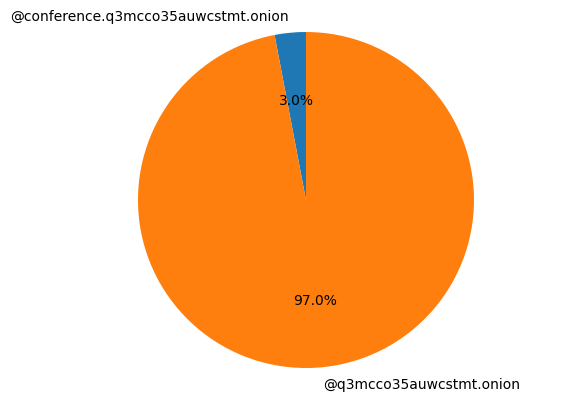

In [49]:
# read the csv file and set ";" to be the seperator
df = pd.read_csv("EmailExtention.csv", sep=";")
df2 = df.copy(deep=True)

df['percent'] = (df['amount'] / df['amount'].sum()) * 100

print(df)

df = df[df.percent > 1]

fig1, ax1 = plt.subplots()
ax1.pie(df['percent'], labels=df['extention'], autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



<font size=1> *Figure 1) Email extension with more than 1% appearance in the distribution.* </font>

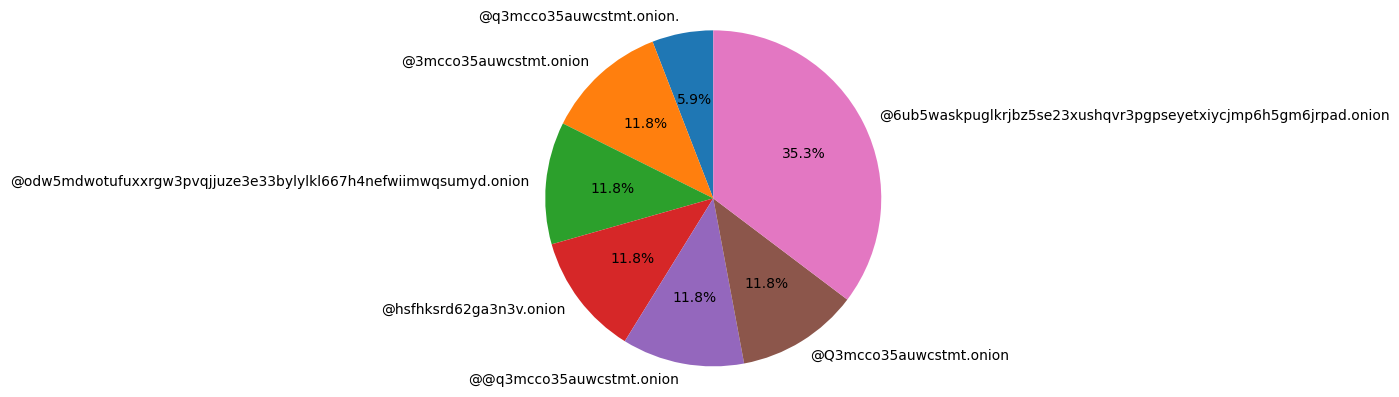

In [50]:
df2 = df2.drop(df2.index[len(df2)-1])
df2 = df2.drop(df2.index[len(df2)-1])

df2['percent'] = (df2['amount'] / df2['amount'].sum()) * 100

fig2, ax2 = plt.subplots()
ax2.pie(df2['percent'], labels=df2['extention'], autopct='%1.1f%%', startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

<font size=1> *Figure 2) Email extension the biggest 2 email extentions excluded.* </font>

10) How many accounts with “@q3mcco35auwcstmt.onion” are there? What are they used for?

<font size=2> These emails are used for sending messages in the chat system they are using </font>

In [55]:
emails = [ ]

with open("jabber_chat_2021_2022_translated.csv", encoding="utf8") as file:
    for counter, line in enumerate(file):
        emailInLineCounter = 0
        substring = [ ]

        noEndline = line.replace('\n', '')
        noEndline = noEndline.replace(',', ';')
        noEndline = noEndline.replace('<', ';')
        noEndline = noEndline.replace('>', ';')
        noEndline = noEndline.replace(' ', ';')
        noEndline = noEndline.replace('/', ';')
        noEndline = noEndline.replace('"', ';')

        for i in noEndline.split(';'):
            substring.append(i)

        for counter, splitted in enumerate(substring):
            if "q3mcco35auwcstmt" in splitted and "@" in splitted and not "@@" in splitted:
                emailInLineCounter+=1
                emails.append((splitted))

print("")
print(f"There are {len(emails)} emails and {len(set(emails))} amount of unique emails with the extension @q3mcco35auwcstmt.onion")

# Save to csv
df = pd.DataFrame(emails)
df.to_csv("Emails.csv")



There are 122187 emails and 335 amount of unique emails with the extension @q3mcco35auwcstmt.onion


11) List of IP addresses used in the data.

In [57]:
pattern = re.compile('(((2[0-5][0-5])|([0-1][0-9][0-9])|([0-9][0-9])|([0-9]))\.){3}((2[0-5][0-5])|([0-1][0-9][0-9])|([0-9][0-9])|([0-9]))')
with open('jabber_chat_2021_2022_translated.csv', 'r', encoding='utf8') as f:
    counter = 0
    for line in f:
        if pattern.match(line):
            counter += 1
            print(counter, line)

1 195.123.212.17","look in your records, did you register these IPs? 217.12.210.41 195.123.212.17",ru

2 103.250.70.198 up, user nextonline, pwd NextOnline@321, port 22 opened, GOOD, port 449 speed 46.2 KB/s

3 119.148.101.102 up, user admin, pwd Mighty@Hat44, port 22 opened, GOOD, port 449 speed 368 KB/s

4 45.126.75.91 up, user Apurbo, pwd Az@#011011, port 22 opened, GOOD, port 449 speed 44.0 KB/s

5 203.76.149.210 up, user itcorporate, pwd Aamra@&*^%, port 22 opened, GOOD, port 449 speed 462 KB/s

6 203.76.101.16 up, user zehad, pwd 321654987, port 22 opened, GOOD, port 449 speed 85.1 KB/s

7 103.142.80.254 up, user ArrowNet1179-Rayhan, pwd 97119712, port 22 opened, GOOD, port 449 speed 297 KB/s

8 103.123.170.120 up, user moshiur, pwd moshiur@789, port 22 opened, GOOD, port 449 speed 20.6 KB/s","103.137.80.22 up, user admin, pwd admin999, port 22 opened, GOOD, port 449 speed 184 KB/s

9 103.250.70.198 up, user nextonline, pwd NextOnline@321, port 22 opened, GOOD, port 449 speed 46.

12) Give example(s) of IP addresses in the data and say what they are used for.

<font size=2> 

a.	They are apparently trying to reserve/buy a set of IPs of some victims together with user credentials. The user responsible for this is Grom, and he discusses it with Defender. Grom provides a list of 15 IP addresses in total. (Later another 10 IPs are provided.)

b.	Later, Derekson sends 16 IPs to Defender, each paired with a date that suggests a date until (or from) which they will be available to them. The list is provided in Appendix G.

c. Another conversation is apparently also about renting IP addresses, where Strix tells Defender that the concerned addresses	need to be paid in the next 2 weeks. They specify the price of each address (in euros or USD). All of them also have specified port 54567, which is not a commonly used port (probably private usage).</font>

13) Give an example(s) of URLs in the data? And say what are they for. With a graph 

<font size=2>There are quite a few different URLs used in the data, a few example of this are privnote.com, which is for sending private notes that can only be read once before it is deleted [3]. Another example is 1ty.me, which is also used for sending private notes that can only be read once [4]. A third example is privatlab.com, which is used for sending private notes, as a temporary email service and for filesharing [5]. In figure 3 the distribution of the different websites used in the data can be seen to compare how much each website is used. The figure only displays websites that appear more than 10 times as there would otherwise be too many different URLs send to display in a good manner.</font>

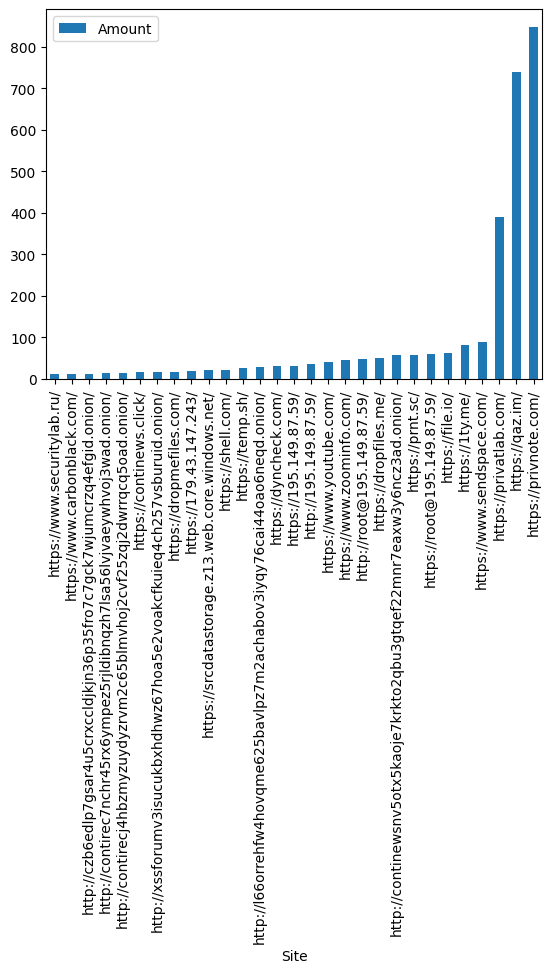

In [39]:
# read the csv file and set ";" to be the seperator
df = pd.read_csv("httpSiteFileCounter.csv", sep=";")

# Set the index to be the site line (the names below the graph)
df.index = df["Site"]

# filter so only sites are shown that have a count of higher than 10, then plot it with a bar graph (.plot() == plotting, .plot.bar() == plot as bar chart)
df[df.Amount > 10].plot.bar()

# Show the chart
plt.show()

<font size=1> *Figure 3: Graph of websites the count of websites visited with the count being higher than 10* </font>

14) Give an example(s) of bitcoin wallets. Try to identify the owner of the wallet. 

<font size=2> 53403,2021-07-12T14:59:12.752518,carter@q3mcco35auwcstmt.onion,stern@q3mcco35auwcstmt.onion,"

привет, закончились битки, всего вышло 3 новых сервера, 14 продлений и две подписки впн. на две недели вперед продлений на 650$ битками 0,019. Отправь, пожалуйста, битки на этот кошелёк 

bc1qvq60dqug0q9l6najzg4xtd6uxkym05tu49here 0,019 спасибо","hello, the cue ball is over, in total 3 new servers, 14 renewals and two vpn subscriptions have been released. two weeks ahead of renewals for $650 in bitcoins 0.019. Please send bitcoins to this wallet bc1qvq60dqug0q9l6najzg4xtd6uxkym05tu49here 0.019 thanks",ru

Make a transfer in the amount of 0.01200000BTC to a Bitcoin wallet using the following details: 3A8xNfeK2dXdDHi5PtKjZFa48HFixTqdAv
0.013845 BTC, 36dmB68ZpeZZThy9SnCHoMvfqCKgZS1Grf
(bitcoinwallet.com)
(Address: bc1qstc4wgx4e2aqm4rtch0sxftr4g7gfq3fg8nwe7 | Blockchain Explorer) X (bitcoinwallet.com)</font>


15) Give an example(s) of fun conversations.

<font size=2>

a.	The conversation talks about the new working conditions they have. It talks about the number of new recruits they can have and how much they are allowed to get paid. It also provides a list of frequently asked questions and their answers. The sender of this message also provides their work phone number for any further questions the recipient may have. The full conversation can be found in Appendix A of this assignment. 

b.	A snippet of a conversation between two people, starts off normal, talking about money and financing, but then the conversation becomes more personal. Appendix B shows a snippet of this conversation.

c.	Appendix C shows a conversation between a supposed newbie Meatball with a “middle manager” Revers, who answers some questions that Meatball has about the group and his ‘job’.

d.	Appendix D shows a conversation about VM Farms that were in the name of Hof. Derekson is asking him whether he needs them anymore, otherwise, he would delete them. Hof says that he doesn’t remember using so many and Derekson probably proceeded to erase them after this conversation.
</font>

16) Give examples of complaining that memebers had.

<font size=2>

a.	Appendix E shows an example of two members complaining about a 3rd member. From what can be understood, there was an agreement to not get involved with the medical sector (to not attack hospitals) but the 3rd member disrespected this agreement and the “boss” is complaining to the 2nd member and discussing how this should be fixed. The “boss” seems quite angry at this situation. 

b.	Appendix F displays a conversation where one of the members is very angry with the other since the other member is depicted as working poorly, and people always complain about him and get angry. They say that he brings more problems than advantages.

</font>

# Conclusion and Reflections

<font size=2>

To conclude this assignment, the following section presents a conclusion regarding the findings, and learnings.

The Assignment started off easy. At first, every member picked a topic from the questions that interested them which was a good strategy since then every member could familiarize themselves with a different part of the logs and later share it with the rest. The problem with this method was that at the end the harder questions were left. From this, it was learned that for this assignment it would have been more beneficial to split the workload throughout several days in the week since it was a large amount of data to analyze. 

After the beginning of the analysis, it was concluded that writing python code for the majority of the questions was the easiest and most efficient method of analysis. It demonstrated that important details or breakthrough clues can easily be missed or overlooked when analyzing a large amount of data manually or partly manually. 

Overall, the group agreed that this assignment was of high interest to everyone. The practical analysis opportunity was a great method of learning about this topic. It displayed a window into the world and mind of ransomware group(s), as well as that of a forensics analyst. 

</font>

# Bibliography

[1]	“Reward Offers for Information to Bring Conti Ransomware Variant Co-Conspirators to Justice - United States Department of State.” https://www.state.gov/reward-offers-for-information-to-bring-conti-ransomware-variant-co-conspirators-to-justice/ (accessed Oct. 19, 2022).

[2]	“NorthwaveSecurity/complete_translation_leaked_chats_conti_ransomware: Complete translation (EN) of the leaked files related to Conti (chat).” https://github.com/NorthwaveSecurity/complete_translation_leaked_chats_conti_ransomware (accessed Oct. 19, 2022).

[3]	“Privnote - Send notes that will self-destruct after being read.” https://privnote.com/ (accessed Oct. 19, 2022).

[4]	“1ty.me - One Time Self Destructing Links For Sharing Sensitive Information.” https://1ty.me/ (accessed Oct. 19, 2022).

[5]	“PrivatLab - temporary mail, privnote, file upload storage.” https://privatlab.com.atlaq.com/ (accessed Oct. 19, 2022).

# Appendix A

**Full conversation corresponding to question 15a.** 

"Good afternoon.

New working conditions, since xx introduced pay per resume. 

1. Access Sj + office rental Hh (best offer)!

    •	month: 		15 tr; 

    •	week: 		7 tr;

    •	3 days: 		5 tr; 

    •	day: 		4 tr.

Superjob limit 25 resumes/working days, no time limit. Hh has already opened 75,000 contacts. Open resumes do not expire during the year. About 25% of resumes will be free for you, as they have already been opened by other managers of our company. For each resume, pay in advance 60 rubles (instead of 73). 

2. Access Sj 

    •	month: 		13 tr;

    •	2 weeks:	 8 tr;

    •	week:		 5 tr; 

    •	3 days: 		3 tr; 

    •	day: 		2 tr. 

Limit 25 resumes/working days, working time is not limited. This site is enough to close 80% of vacancies. 

3. Rent of our office for Hh 
    •	month: 		7 tr; 
    
    •	week: 		4 tr; 

    •	3 days: 		3 tr; 
    
    •	day: 		2 tr. 

For each resume, pay in advance 60 rubles. (instead of 73). You can open as many tabs with resumes as you like and see all the information, except for the contact, and pay only for the resumes you need. Also, open resumes do not burn out, but are available throughout the year. About 25% of resumes will be free for you, as they have already been opened by other managers of our company. 

If you have any questions, here is my work number, I will tell you everything in detail 89062696551 

Answers to the most frequently asked questions: 

1.	How are resume openings counted? 

You can open as many resume tabs as you like and see all the information except for the contact information. By clicking on the &quot;Open contacts&quot; button, you are charged 1 view. At the bottom of the program, you see the number of resumes available to you. 

2.	How to pay for a resume package? 
First, you determine how many resumes you need and pay upfront for the required amount. If the resume is not enough, you can buy more by notifying me 24 hours in advance. 

3.	How many times can I view resumes per day? 
As much as you want within your package, at least all in 1 day.

4.	What does it mean resumes can burn? 
For example, you pay a tariff for a week or a month, your resumes will be open during this period. We have paid for a year, so resumes will not burn.

5.	Will some resumes be opened? 
Yes, some resumes are already open for you, over time their number will be 30-35%. Those. out of 10 resumes, approximately 3 will already be available. 

6.	How do I get access? 
The entrance to the office is carried out through a special program - this is dictated by the security conditions. Everything else is the same. 

7.	How many people can use the purchased cabinet? 
One cabinet - one user, if you need more users, buy an additional cabinet.
 
8.	When does the access time start running? 
As soon as I sent the login / password.",ru”


# Appendix B

**Full conversation corresponding to question 15b.**

553,2021-10-09T02:16:46.232707,ghost@q3mcco35auwcstmt.onion,mango@q3mcco35auwcstmt.onion,поскольку у меня тяга на крипту,because I have a craving for crypto,ru

554,2021-10-09T02:17:10.380884,ghost@q3mcco35auwcstmt.onion,mango@q3mcco35auwcstmt.onion,Я про теб всё время думаю.,I think about you all the time.,ru

555,2021-10-09T02:17:14.724874,ghost@q3mcco35auwcstmt.onion,mango@q3mcco35auwcstmt.onion,тебя,you,ru

564,2021-10-09T02:18:11.329904,ghost@q3mcco35auwcstmt.onion,mango@q3mcco35auwcstmt.onion,У меня опыт полной свободы своего времени и трата его на программирование приносит мне счастье.,I have the experience of complete freedom of my time and spending it on programming brings me happiness.,ru

565,2021-10-09T02:18:27.922769,ghost@q3mcco35auwcstmt.onion,mango@q3mcco35auwcstmt.onion,С недавних пор я очень полюбил наш коллектив.,"Recently, I really fell in love with our team.",ru


# Appendix C

**Full conversation corresponding to question 15c.**

(Russian text did not convert well from used text editor)

41641,2021-06-
11T18:01:15.677682,meatball@q3mcco35auwcstmt.onion,revers@q3mcco35auwcstmt.onion,Ð—Ð´Ñ€Ð°Ð²ÑÑ‚Ð²ÑƒÐ¹,Hi,ru

41642,2021-06-11T18:06:34.689332,revers@q3mcco35auwcstmt.onion,meatball@q3mcco35auwcstmt.onion,Ð¿Ñ€Ð¸Ð²ÐµÑ‚,Hey,ru

41643,2021-06-11T18:14:22.640649,meatball@q3mcco35auwcstmt.onion,revers@q3mcco35auwcstmt.onion,Ð¢Ñ‹ Ð½Ð°Ñ…Ð¾Ð´Ð¸ÑˆÑŒÑÑ Ð² Ð Ð¾ÑÑÐ¸Ð¸?,Are you in Russia?,ru

41644,2021-06-11T18:14:39.241666,revers@q3mcco35auwcstmt.onion,meatball@q3mcco35auwcstmt.onion,Ñ‡Ñ‚Ð¾ Ð·Ð° Ð²Ð¾Ð¿Ñ€Ð¾ÑÑ‹ ?,what kind of questions?,ru

41645,2021-06-11T18:15:03.936692,meatball@q3mcco35auwcstmt.onion,revers@q3mcco35auwcstmt.onion,Ð§ÐµÐ¼ Ð·Ð´ÐµÑÑŒ Ð½ÑƒÐ¶Ð½Ð¾ Ð·Ð°Ð½Ð¸Ð¼Ð°Ñ‚ÑŒÑÑ?,What should be done here?,ru

41646,2021-06-11T18:15:25.340712,revers@q3mcco35auwcstmt.onion,meatball@q3mcco35auwcstmt.onion,Ñ Ð´ÑƒÐ¼Ð°ÑŽ Ñ‡Ñ‚Ð¾ Ð·Ð°Ñ€Ð°Ð±Ð°Ñ‚Ñ‹Ð²Ð°Ñ‚ÑŒ,I think to earn,ru

41647,2021-06-11T18:15:42.824699,meatball@q3mcco35auwcstmt.onion,revers@q3mcco35auwcstmt.onion,ÐšÐ°Ðº Ð½Ð°Ñ‡Ð°Ñ‚ÑŒ Ð·Ð°Ñ€Ð°Ð±Ð°Ñ‚Ñ‹Ð²Ð°Ñ‚ÑŒ?,How to start earning?,ru

41648,2021-06-11T18:15:53.000847,revers@q3mcco35auwcstmt.onion,meatball@q3mcco35auwcstmt.onion,ÐºÑ‚Ð¾ Ñ‚ÐµÐ±Ñ ÐºÐ¾ Ð¼Ð½Ðµ Ð¾Ñ‚Ð¿Ñ€Ð°Ð²Ð¸Ð» ?,who sent you to me?,ru

41649,2021-06-11T18:16:03.051409,meatball@q3mcco35auwcstmt.onion,revers@q3mcco35auwcstmt.onion,Ð¢Ñ‹ ÑÐ°Ð¼.,You yourself.,ru

41650,2021-06-11T18:16:10.326899,revers@q3mcco35auwcstmt.onion,meatball@q3mcco35auwcstmt.onion,:D,:D,en

41652,2021-06-11T18:16:19.916215,meatball@q3mcco35auwcstmt.onion,revers@q3mcco35auwcstmt.onion,Ð’ Ñ‡Ð°Ñ‚Ðµ Ñ‚Ñ€Ð¸ Ñ‡ÐµÐ»Ð¾Ð²ÐµÐºÐ° Ð½Ðµ ÑÑ‡Ð¸Ñ‚Ð°Ñ Ð¼ÐµÐ½Ñ.,"There are three people in the chat, not counting me.",ru

41654,2021-06-11T18:17:20.433869,revers@q3mcco35auwcstmt.onion,meatball@q3mcco35auwcstmt.onion,Ð½Ð¸Ðº  Ñ ÐºÐ¾Ñ‚Ð¾Ñ€Ð¾Ð³Ð¾ ÑÐ¾Ð±ÐµÑÐµÐ´Ð¾Ð²Ð°Ð»ÑÑ Ð¿Ð¾Ð´ÑÐºÐ°Ð¶Ð¸,the nickname you interviewed tell me,ru

41655,2021-06-11T18:17:37.080080,revers@q3mcco35auwcstmt.onion,meatball@q3mcco35auwcstmt.onion,Ð´Ð°Ð»ÑŒÑˆÐµ Ð½Ð°Ð¿Ñ€Ð°Ð²Ð»ÑŽ Ñ‚ÐµÐ±Ñ,I will guide you further,ru

41656,2021-06-
11T18:17:43.353202,revers@q3mcco35auwcstmt.onion,meatball@q3mcco35auwcstmt.onion,Ð² Ð½Ð¾Ð²Ñ‹Ð¹ Ñ‡Ð°Ñ‚,to a new chat,ru

41657,2021-06-11T18:17:46.937947,meatball@q3mcco35auwcstmt.onion,revers@q3mcco35auwcstmt.onion,firefox333,firefox333,en

41659,2021-06-11T18:17:58.116816,revers@q3mcco35auwcstmt.onion,meatball@q3mcco35auwcstmt.onion,ÑÑ‚Ð¾ Ð½Ð¸Ðº Ñ‚Ð¾Ð³Ð¾ ÐºÑ‚Ð¾ ÑÐ¾Ð±ÐµÑÐµÐ´Ð¾Ð²Ð°Ð» Ñ‚ÐµÐ±Ñ,this is the nickname of the person who interviewed you,ru

41661,2021-06-11T18:18:21.244301,meatball@q3mcco35auwcstmt.onion,revers@q3mcco35auwcstmt.onion,Ð´Ð°,Yes,

41662,2021-06-11T18:18:33.822490,revers@q3mcco35auwcstmt.onion,meatball@q3mcco35auwcstmt.onion,ÐµÐ¼Ñƒ Ñ‚Ñ‹ Ð¿Ð¾Ð´ ÐºÐ°ÐºÐ¸Ð¼ Ð½Ð¸ÐºÐ¾Ð¼ Ð¿Ð¸ÑÐ°Ð» ?,under what nickname did you write to him?,ru

41663,2021-06-11T18:18:52.605312,meatball@q3mcco35auwcstmt.onion,revers@q3mcco35auwcstmt.onion,neversay,neversay,fr

41666,2021-06-11T18:19:16.711030,revers@q3mcco35auwcstmt.onion,meatball@q3mcco35auwcstmt.onion,Ð¾Ðº,Ok,

41667,2021-06-11T18:19:30.333561,revers@q3mcco35auwcstmt.onion,meatball@q3mcco35auwcstmt.onion,ÑÐ´ÐµÐ»Ð°ÑŽ Ñ‚ÐµÐ±Ðµ Ð² Ð¿Ð¾Ð½ÐµÐ´ÐµÐ»ÑŒÐ½Ð¸Ðº ÑƒÑ‡ÐµÑ‚Ð½ÑƒÑŽ Ð·Ð°Ð¿Ð¸ÑÑŒ Ð¸ Ð¿Ð¾Ð·Ð½Ð°ÐºÐ¾Ð¼Ð»ÑŽ Ñ Ñ€ÑƒÐºÐ¾Ð²Ð¾Ð´Ð¸Ñ‚ÐµÐ»ÐµÐ¼,I will make an account for you on Monday and introduce you to the manager,ru

41669,2021-06-11T18:19:57.822557,meatball@q3mcco35auwcstmt.onion,revers@q3mcco35auwcstmt.onion,Ð¼Ð½Ðµ Ð³Ð¾Ð²Ð¾Ñ€Ð¸Ð»Ð¸ Ñ‚Ñ‹ Ñ€ÑƒÐºÐ¾Ð²Ð¾Ð´Ð¸Ñ‚ÐµÐ»ÑŒ,I was told you are the leader,ru

41671,2021-06-11T18:20:09.659136,revers@q3mcco35auwcstmt.onion,meatball@q3mcco35auwcstmt.onion,Ñ‚Ð°Ð¼ ÐµÑ‰Ðµ ÐµÑÑ‚ÑŒ Ñ€ÑƒÐºÐ¾Ð²Ð¾Ð´Ð¸Ñ‚ÐµÐ»Ð¸ ÑÑ€ÐµÐ´Ð½ÐµÐ³Ð¾ Ð·Ð²ÐµÐ½Ð°,there are middle managers,ru

41672,2021-06-11T18:20:13.454483,meatball@q3mcco35auwcstmt.onion,revers@q3mcco35auwcstmt.onion,stern ÐºÑ‚Ð¾?,stern who?,ru

41673,2021-06-11T18:20:23.384439,revers@q3mcco35auwcstmt.onion,meatball@q3mcco35auwcstmt.onion,ÑÑ‚ÐµÑ€Ð½ ÑÑ‚Ð¾ Ð±Ð¸Ð³ Ð±Ð¾Ñ ),stern is big boss,ru

41674,2021-06-11T18:20:39.993949,meatball@q3mcco35auwcstmt.onion,revers@q3mcco35auwcstmt.onion,viper&,viper&,en

41675,2021-06-11T18:20:45.844550,revers@q3mcco35auwcstmt.onion,meatball@q3mcco35auwcstmt.onion,Ñ€ÐµÐºÑ€ÑƒÑ‚Ð¾Ñ€,recruiter,ru

41677,2021-06-11T18:20:49.094094,revers@q3mcco35auwcstmt.onion,meatball@q3mcco35auwcstmt.onion,ÐºÑ‚Ð¾ Ñ‚ÐµÐ±Ñ Ð½Ð°ÑˆÐµÐ»,who found you,ru

41678,2021-06-11T18:20:53.315990,meatball@q3mcco35auwcstmt.onion,revers@q3mcco35auwcstmt.onion,Ñ‚Ñ‹,you,ru

41679,2021-06-11T18:21:01.798847,revers@q3mcco35auwcstmt.onion,meatball@q3mcco35auwcstmt.onion,Ñ€ÑƒÐºÐ¾Ð²Ð¾Ð´Ð¸Ñ‚ÐµÐ»ÑŒ Ð³Ñ€ÑƒÐ¿Ð¿Ñ‹,team leader,ru

41680,2021-06-11T18:21:08.058830,revers@q3mcco35auwcstmt.onion,meatball@q3mcco35auwcstmt.onion,Ð² ÐºÐ¾Ñ‚Ð¾Ñ€ÑƒÑŽ Ñ‚Ñ‹ Ð¿Ñ€Ð¸ÑˆÐµÐ» Ñ€Ð°Ð±Ð¾Ñ‚Ð°Ñ‚ÑŒ,where did you come to work,ru

41681,2021-06-11T18:21:21.990217,meatball@q3mcco35auwcstmt.onion,revers@q3mcco35auwcstmt.onion,ÑÐºÐ¾Ð»ÑŒÐºÐ¾ Ñ‡ÐµÐ»Ð¾Ð²ÐµÐº Ð² Ð³Ñ€ÑƒÐ¿Ð¿Ðµ Ð½Ð¾Ð¼Ð¸Ð½Ð°Ð»ÑŒÐ½Ð¾,how many people in the group nominally,ru

41682,2021-06-11T18:21:23.348065,revers@q3mcco35auwcstmt.onion,meatball@q3mcco35auwcstmt.onion,Ð½Ð¾ Ð³Ñ€ÑƒÐ¿Ð¿Ð° Ð½Ð° ÑÑ‚Ð¾Ð»ÑŒÐºÐ¾ Ð±Ð¾Ð»ÑŒÑˆÐ°Ñ Ñ‡Ñ‚Ð¾ ÐµÑÑ‚ÑŒ ÐµÑ‰Ðµ Ñ€ÑƒÐºÐ¾Ð²Ð¾Ð´Ð¸Ñ‚ÐµÐ»Ð¸ ÑÑ€ÐµÐ´Ð½ÐµÐ³Ð¾ Ð·Ð²ÐµÐ½Ð°,but the group is so big that there are still middle managers,ru

41683,2021-06-11T18:21:33.147169,revers@q3mcco35auwcstmt.onion,meatball@q3mcco35auwcstmt.onion,Ñ‡Ñ‚Ð¾ Ð·Ð° Ð²Ð¾Ð¿Ñ€Ð¾ÑÑ‹ ?,what kind of questions?,ru

41684,2021-06-11T18:21:48.860377,revers@q3mcco35auwcstmt.onion,meatball@q3mcco35auwcstmt.onion,Ð² ÐºÐ¾Ñ‚Ð¾Ñ€Ð¾Ð¹ Ñ‚Ñ‹ Ñ€Ð°Ð±Ð¾Ñ‚Ð°Ñ‚ÑŒ Ð±ÑƒÐ´ÐµÑˆÑŒ ?,where will you work?,ru

41685,2021-06-11T18:21:54.205354,revers@q3mcco35auwcstmt.onion,meatball@q3mcco35auwcstmt.onion,15,15,en

41686,2021-06-11T18:21:55.681023,meatball@q3mcco35auwcstmt.onion,revers@q3mcco35auwcstmt.onion,Ð´Ð°,Yes,

41687,2021-06-11T18:22:07.066732,revers@q3mcco35auwcstmt.onion,meatball@q3mcco35auwcstmt.onion,Ð² ÐºÐ°Ð¶Ð´Ñ‹Ñ… Ð¿Ð¾ Ñ€Ð°Ð·Ð½Ð¾Ð¼Ñƒ,each in a different way,ru

41688,2021-06-11T18:22:41.633539,meatball@q3mcco35auwcstmt.onion,revers@q3mcco35auwcstmt.onion,Ð¼Ð¾Ð¶ÐµÑ‚ Ð¿Ð¾Ð´ÑÐºÐ°Ð¶ÐµÑˆÑŒ?,can you advise?,ru

41689,2021-06-11T18:23:00.493297,revers@q3mcco35auwcstmt.onion,meatball@q3mcco35auwcstmt.onion,Ñ‡Ñ‚Ð¾ Ð¸Ð¼ÐµÐ½Ð½Ð¾ ?,what exactly ?,ru

41690,2021-06-11T18:23:16.531341,meatball@q3mcco35auwcstmt.onion,revers@q3mcco35auwcstmt.onion,ex.robpay.org Ñ‡ÑŒÑ Ñ€Ð°Ð±Ð¾Ñ‚Ð°?,ex.robpay.org whose job is it?,ru

41691,2021-06-11T18:23:38.869412,revers@q3mcco35auwcstmt.onion,meatball@q3mcco35auwcstmt.onion,Ð½Ðµ Ð·Ð½Ð°ÑŽ,Do not know,ru

41692,2021-06-11T18:23:46.723699,revers@q3mcco35auwcstmt.onion,meatball@q3mcco35auwcstmt.onion,Ñ‡Ðµ Ñ‚Ð¾Ñ Ñ‚Ñ€Ð°Ð½Ð½Ñ‹Ð¹ Ñ‚Ñ‹ ÐºÐ°ÐºÐ¾Ð¹ Ñ‚Ð¾,what are you strange,ru

41693,2021-06-11T18:24:09.799168,meatball@q3mcco35auwcstmt.onion,revers@q3mcco35auwcstmt.onion,Ñƒ Ð²ÑÐµÑ… ÑÐ²Ð¾Ð¸ Ñ„Ð¸ÑˆÐºÐ¸,everyone has their chips,ru

41694,2021-06-11T18:24:40.665014,meatball@q3mcco35auwcstmt.onion,revers@q3mcco35auwcstmt.onion,Ð´Ð¾ ÑÐ²ÑÐ·Ð¸. Ð»Ð¸Ñ,before communication. fox,ru

41704,2021-06-11T18:29:16.552823,revers@q3mcco35auwcstmt.onion,meatball@q3mcco35auwcstmt.onion,Ð¸ Ð² Ñ‡ÐµÐ¼ Ñ„Ð¸ÑˆÐºÐ¸ ?,and what are the chips?,ru


# Appendix D

**Full conversation corresponding to question 15d.**

4489,2021-10-05T17:53:20.575295,derekson@q3mcco35auwcstmt.onion,hof@q3mcco35auwcstmt.onion,Привет,Hey,

4490,2021-10-05T17:54:16.685792,hof@q3mcco35auwcstmt.onion,derekson@q3mcco35auwcstmt.onion,привет,Hey,

4491,2021-10-05T17:54:49.754322,derekson@q3mcco35auwcstmt.onion,hof@q3mcco35auwcstmt.onion,Хочу уточнить кое-что,I want to clarify something,ru

4492,2021-10-05T17:55:43.574420,derekson@q3mcco35auwcstmt.onion,hof@q3mcco35auwcstmt.onion,"У нас есть ферма ВМ
На ней около 20 тачек с названием hof
Скажи, пожалуйста, нужны они тебе еще. Если нет, я удалю","We have a VM farm. There are about 20 cars on it with the name hof. Please tell me you need them more. If not, I will delete",ru

4493,2021-10-05T17:56:08.990594,hof@q3mcco35auwcstmt.onion,derekson@q3mcco35auwcstmt.onion,что за тачки?,what kind of cars?,ru

4494,2021-10-05T17:56:14.167246,hof@q3mcco35auwcstmt.onion,derekson@q3mcco35auwcstmt.onion,да еще 20,"yes, 20 more",ru

4495,2021-10-05T17:57:04.516396,hof@q3mcco35auwcstmt.onion,derekson@q3mcco35auwcstmt.onion,"что то не помню, чтобы я столько использовал",I don&#39;t remember that I used so much,ru

4496,2021-10-05T17:57:10.270595,derekson@q3mcco35auwcstmt.onion,hof@q3mcco35auwcstmt.onion,"win10-64 все. Сделаны группой с названием ""Hof group""",win10-64 all. Made by a group called &quot;Hof group&quot;,ru

4497,2021-10-05T17:57:39.553898,derekson@q3mcco35auwcstmt.onion,hof@q3mcco35auwcstmt.onion,"Я давно не видел, чтобы ими пользовались. Вот написал уточнить",I haven&#39;t seen them used in a long time. Here I wrote to clarify,ru

4498,2021-10-05T17:58:01.514922,hof@q3mcco35auwcstmt.onion,derekson@q3mcco35auwcstmt.onion,"удаляй, не помню чтобы я ими пользовался","delete, I do not remember that I used them",ru

4499,2021-10-05T17:58:08.831920,derekson@q3mcco35auwcstmt.onion,hof@q3mcco35auwcstmt.onion,"хорошо, спасибо","OK, thank you",ru


# Appendix E

**Full conversation corresponding to question 16a.**

3437,2021-12-28T22:25:17.313681,andy@q3mcco35auwcstmt.onion,many@q3mcco35auwcstmt.onion,Congratulations! Now you can chat!,Congratulations! Now you can chat!,en

3438,2022-01-25T01:25:07.096572,cybergangster@q3mcco35auwcstmt.onion,demon@q3mcco35auwcstmt.onion,Здарова,Healthy,be

3439,2022-01-25T01:25:07.100568,cybergangster@q3mcco35auwcstmt.onion,demon@q3mcco35auwcstmt.onion,Давай доллара из игры выведем,Let&#39;s get the dollar out of the game,ru

3440,2022-01-25T01:25:07.105429,cybergangster@q3mcco35auwcstmt.onion,demon@q3mcco35auwcstmt.onion,Он долбоеб отбитый,He is a fucked up bastard,ru

3441,2022-01-25T01:25:07.107708,cybergangster@q3mcco35auwcstmt.onion,demon@q3mcco35auwcstmt.onion,Он меня тогда наебал что он с тобой договорился госпиталь вьебать,He then fucked me that he agreed with you to fuck the hospital,ru

3442,2022-01-25T01:25:07.109468,cybergangster@q3mcco35auwcstmt.onion,demon@q3mcco35auwcstmt.onion,И сейчас опять поставил госпиталь,And now he put the hospital again,ru

3443,2022-01-25T01:25:07.112456,cybergangster@q3mcco35auwcstmt.onion,demon@q3mcco35auwcstmt.onion,Это неуважение,This is disrespect,ru

3444,2022-01-25T01:25:07.114558,cybergangster@q3mcco35auwcstmt.onion,demon@q3mcco35auwcstmt.onion,2 раза я ему говорил что мы медецинский сектор не трогаем,2 times I told him that we do not touch the medical sector,ru

3445,2022-01-25T01:25:07.116596,mango@q3mcco35auwcstmt.onion,demon@q3mcco35auwcstmt.onion,зп раздал все четко,sn gave out everything clearly,ru

3446,2022-01-25T01:25:07.117248,mango@q3mcco35auwcstmt.onion,demon@q3mcco35auwcstmt.onion,чусть людей уже отсеилась,a few people have already dropped out,ru

3447,2022-01-25T01:25:07.117750,veron@q3mcco35auwcstmt.onion,demon@q3mcco35auwcstmt.onion,"привет, у меня никто не работает на проекте, решите вопрос","hello, no one works for me on the project, solve the issue",ru


# Appendix F

**Full conversation corresponding to question 16b.**

53254,2022-01-27T18:04:54.195313,baget@q3mcco35auwcstmt.onion,mango@q3mcco35auwcstmt.onion,Ты там жив?,Are you alive there?,ru

53255,2022-01-27T18:24:09.347225,mango@q3mcco35auwcstmt.onion,dollar@q3mcco35auwcstmt.onion,я тут,I&#39;m here,uk

53256,2022-01-27T18:24:09.351648,mango@q3mcco35auwcstmt.onion,dollar@q3mcco35auwcstmt.onion,ну так а че не так то,"well, so why not",ru

53257,2022-01-27T18:24:09.352635,mango@q3mcco35auwcstmt.onion,dollar@q3mcco35auwcstmt.onion,"хуя вы его расчехлили там какими то лошадиными процентами, накидали бедолагу, интриги какие то плетете","fuck you uncovered it there with some kind of horse interest, threw on the poor fellow, weave some kind of intrigue",ru

53258,2022-01-27T18:24:09.353229,mango@q3mcco35auwcstmt.onion,dollar@q3mcco35auwcstmt.onion,от вас реально больше проблем чем толку,from you really more problems than good,ru

53259,2022-01-27T18:24:09.354576,mango@q3mcco35auwcstmt.onion,dollar@q3mcco35auwcstmt.onion,одно палево,one fawn,ru

53260,2022-01-27T18:24:09.355231,mango@q3mcco35auwcstmt.onion,dollar@q3mcco35auwcstmt.onion,больницы ваши задолбали уже,your hospitals are already sick,ru

53261,2022-01-27T18:24:09.356175,mango@q3mcco35auwcstmt.onion,dollar@q3mcco35auwcstmt.onion,"какие то детище твое конти и с чего вдруг тоже непонятно, причем тут ты вообще и конти)))))) Стерну я это сам сегодня все показал еще утром, так что я не знаю что вы там решать со мной собрались","what kind of brainchild is your conti and why is it suddenly also incomprehensible, where are you in general and conti)))))) Stern, I showed it all myself today in the morning, so I don’t know what you were going to decide with me",ru

53262,2022-01-27T18:24:09.357149,mango@q3mcco35auwcstmt.onion,dollar@q3mcco35auwcstmt.onion,"я думаю что решать тут нечего, раз вы такое себе позволяете, раз на вас постоянно все жалуются и агрятся то нахуй оно нам вообще надо, портить свою репутацию после ваших интрижек","I think that there is nothing to decide here, since you allow yourself this, since everyone constantly complains about you and gets angry, then fuck it, we generally need it, spoil our reputation after your intrigues",ru

53263,2022-01-27T18:24:09.357922,mango@q3mcco35auwcstmt.onion,dollar@q3mcco35auwcstmt.onion,"5% за переговоры, 20 процентов за расходы и организацию - на что ??? вам самим то не смешно от этого всего?","5% for negotiations, 20% for expenses and organization - for what??? you yourself is not funny from all this?",ru

53264,2022-01-27T18:24:09.358739,mango@q3mcco35auwcstmt.onion,dollar@q3mcco35auwcstmt.onion,"нет у нас таких процентов ни для кого, если вы хотите работать - работайте нормально, мы все в одной лодке","we don’t have such percentages for anyone, if you want to work, work normally, we are all in the same boat",ru

53265,2022-01-27T18:24:09.359805,mango@q3mcco35auwcstmt.onion,dollar@q3mcco35auwcstmt.onion,"и дереку можешь передать что мне глубоко похуй на ваши там настроения, меня мне оно нахуй не нужно за вас постоянно отмазываться и решать что то","and you can tell Derek that I deeply don’t give a fuck about your moods there, I don’t fucking need it for you to constantly excuse yourself and decide something",ru

53266,2022-01-27T18:24:42.925344,dollar@q3mcco35auwcstmt.onion,defender@q3mcco35auwcstmt.onion,netwalker@q3mcco35auwcstmt.onion,netwalker@q3mcco35auwcstmt.onion,en


# Appendix G

206.188.196.239 - 27.02

168.100.8.69   - 26.02

168.100.11.213  - 28.02

195.123.222.91  - 05.03

45.61.136.202  - 01.03

162.33.179.125  - 25.02

185.64.104.5   - 05.03

217.12.204.65  - 26.02

185.64.104.141   - 25.02

185.14.28.109  - 26.02

5.181.156.15  - 07.03

162.33.178.178  - 23.02

45.61.138.153  - 22.02

185.64.104.36   - 04.03

195.123.228.5  - 28.02

195.123.228.6  - 28.02